## Parameter Fitting with Gradient Decent:

Start with the nonlinear gradient decent optimizer that operates by estimating the gradient numerically. `optimize.leastsq` takes two arguments: A function `f(p)` to be optimized, and an initial parameter `p0`, where `p0` may be a list of parameter. 

Lets take a look at the data, and then define out model. In this case, we will be fitting the simple SIR model with the initial populations $I(0) = 1$ and $S(0) = 762$. Remember though that these initial conditions are parameters themselves (they must be fixed before we can call ODEINT) and so we can fit them too. 


In [19]:
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

infected = [0,3, 7, 22, 78, 233, 300, 256, 233, 189, 128, 72, 33, 11, 6]
t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y0 = [762,1]


## Define Model
def model(Y, t, p):
    S,I = Y
    B,G = p
    return [-B*S*I, B*S*I - G*I]

## Define Loss Function
def error(p):
    sol = odeint(model, y0, t, (p,))
#    print(p)
    return sol[:,1] - infected

params = [.01,.1]

## Given initial Conditions
    
opt = optimize.leastsq(error, params) 
opt

(array([0.00219349, 0.44014099]), 1)

In [13]:
opt[0]

array([0.00219349, 0.44014099])

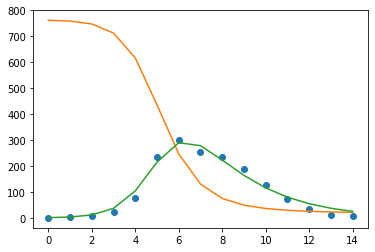

In [15]:
plt.plot(t, infected,'o')
plt.plot(t, odeint(model, y0, t, (opt[0],)))

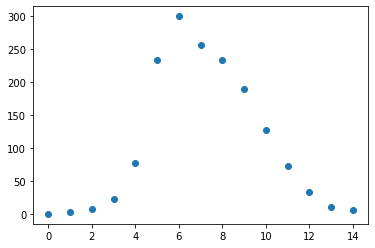

In [3]:
plt.plot(t, infected,'o')
#plt.plot(t, integrate.odeint(model,y0,t,tuple(opt[0])))

What if we fit the initial population as well?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(array([1.72626986e+02, 2.99463923e+01, 3.71794715e-03, 6.89530236e-02]), 5)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


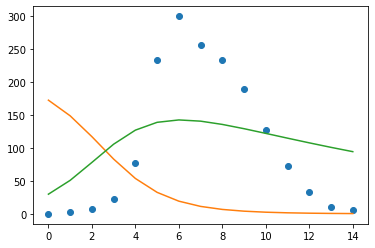

In [18]:
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

infected = [0,3, 7, 22, 78, 233, 300, 256, 233, 189, 128, 72, 33, 11, 6]
t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y0 = [762,1]


## Define Model
def model(Y, t, p):
    S,I = Y
    B,G = p
    return [-B*S*I, B*S*I - G*I]

## Define Loss Function
def error(params):
    y0 = params[0:2]
    p = params[2:]
    sol = odeint(model, y0, t, (p,))
    return sol[:,1] - infected

params = [762,1,.01,.1]

## Given initial Conditions

opt = optimize.leastsq(error, params) 
print(opt)

plt.plot(t, infected,'o')
plt.plot(t, odeint(model, opt[0][:2], t, (opt[0][2:],)))

We've fallen into a local minimum! It can be important to use any information you have to restrict the parameter space. 

## Example:

Competition Model, data from 

https://jmahaffy.sdsu.edu/courses/f09/math636/lectures/competition3/competition3.html

This tracks the volume of two competing species of yeast.

\begin{align*}
X &= X(b_1 - d_1X - c_1Y)
\\
Y &= Y(b_2 - d_2Y - c_2X)
\end{align*}

In [34]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t = [0,1.5,9,10,18,18,23,25.5,27,38,42,45.5,47]
Scerevisiae = [0.375,0.92,3.08,3.99,4.69,5.78,6.15,9.91,9.47,10.57,7.27,9.88,8.3]
Skephir = [0.29,0.37,0.63,0.98,1.47,1.22,1.46,1.11,1.225,1.1,1.71,0.96,1.84]

y0 = [.1,.1]

def model(Y, t, p):
    b1,d1,c1,b2,d2,c2 = p
    X,Y = Y
    return [X*(b1 - d1*X - c1*Y),Y*(b2 - d2*Y - c2*X)]

# Define Loss Function
def error(params):
    p = params
    y = odeint(model, y0, t, (p,))
    return (y - np.array([Scerevisiae,Skephir]).T).reshape(-1)
    
params = [.01,.01,.01,.01,.01,.01]
    
error(params)
opt = optimize.leastsq(error, params) 
opt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


(array([ 0.28770868,  0.0297817 ,  0.01298602,  0.13022423, -0.18584468,
         0.04522953]),
 5)

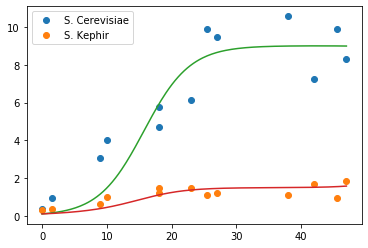

In [42]:
plt.plot(t, Scerevisiae,'o',label="S. Cerevisiae")
plt.plot(t, Skephir,'o', label="S. Kephir")
plt.legend()
plt.plot(np.linspace(0,t[-1],200), odeint(model,y0,np.linspace(0,t[-1],200),(opt[0],)))

Note the constants. This is bad! It turns out that we're predicting the death rate due to overcrowding is negative... We should consider different starting values.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(array([ 1.54706187, -0.22258665,  2.44201076,  0.92653198,  1.49866578,
       -0.13877795]), 2)


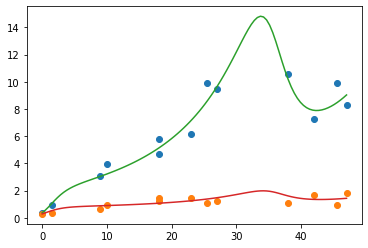

In [43]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t = [0,1.5,9,10,18,18,23,25.5,27,38,42,45.5,47]
Scerevisiae = [0.375,0.92,3.08,3.99,4.69,5.78,6.15,9.91,9.47,10.57,7.27,9.88,8.3]
Skephir = [0.29,0.37,0.63,0.98,1.47,1.22,1.46,1.11,1.225,1.1,1.71,0.96,1.84]

y0 = [Scerevisiae[0],Skephir[0]]

def model(Y, t, p):
    b1,d1,c1,b2,d2,c2 = p
    X,Y = Y
    return [X*(b1 - d1*X - c1*Y),Y*(b2 - d2*Y - c2*X)]

def loss(p):
    y = odeint(model,y0,t,(p,))
    return (y - np.array([Scerevisiae,Skephir]).T).ravel()
    
params = [.25,.02,.057,.057,.0098,.0048]
    
opt = optimize.leastsq(loss, params) 

plt.plot(t, Scerevisiae,'o')
plt.plot(t, Skephir,'o')
plt.plot(np.linspace(0,t[-1],100), odeint(model,y0,np.linspace(0,t[-1],100),(opt[0],)))
print(opt)

So even though we start at a stable set of equilibira, we cant find it. This is the danger of overfitting, the solver  simply doesn't "see" the points away from the data points and they can be as bad as possible. 


#### Alternative Formulation:

How does the source above get so much better results then us? Well, they grow their yeast separetly and fit logistic models to them:

In [ ]:
## Single Population Yeast Data

t1 = [9,10,23,25.5,42,45.5,66,87,111,135]
Skephir_mono  = [1.27,1,1.7,2.33,2.73,4.56,4.87,5.67,5.8,5.83]


t2 = [0,1.5,9,10,18,18,23,25.5,27,34,38,42,45.5,47]
Scerevisiae_mono = [0.37,1.63,6.2,8.87,10.66,10.97,12.5,12.6,12.9,13.27,12.77,12.87,12.9,12.7]

Y0:  1.054736391337602
b:  0.057442052129218456
d:  0.009768668323201373


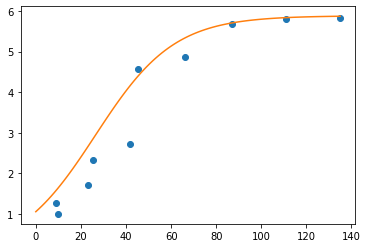

In [45]:
t = [9,10,23,25.5,42,45.5,66,87,111,135]
Skephir_mono  = [1.27,1,1.7,2.33,2.73,4.56,4.87,5.67,5.8,5.83]

y0 = Skephir_mono[0]

def model(Y, t, b,d):
    return Y*(b - d*Y)

def loss(p):
    y0, p1, p2 = p
    y = odeint(model,y0,t,(p1,p2))
#    print(y[:,0])
    return y[:,0] - np.array(Skephir_mono)
    
params = [y0, .001,.01]
    
opt = optimize.leastsq(loss, params) 

print('Y0: ', opt[0][0])
print('b: ', opt[0][1])
print('d: ', opt[0][2])

plt.plot(t, Skephir_mono,'o')
plt.plot(np.linspace(0,t[-1],100), odeint(model,opt[0][0],np.linspace(0,t[-1],100),(opt[0][1],opt[0][2])))

For the other yeast we have:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Y0:  1.2343640141275993
b:  0.2586358386628328
d:  0.020297666177709655


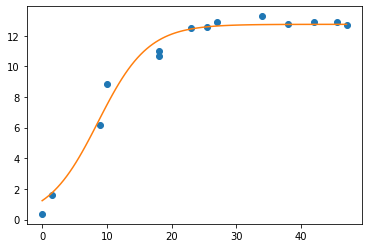

In [47]:
t = [0,1.5,9,10,18,18,23,25.5,27,34,38,42,45.5,47]
Scerevisiae_mono = [0.37,1.63,6.2,8.87,10.66,10.97,12.5,12.6,12.9,13.27,12.77,12.87,12.9,12.7]


y0 = Scerevisiae_mono[0]
y0 = 1.234

def model(Y, t, b,d):
    return Y*(b - d*Y)

def loss(p):
    y0, p1, p2 = p
    y = odeint(model,y0,t,(p1,p2))
#    print(y[:,0])
    return y[:,0] - np.array(Scerevisiae_mono)
    
params = [y0, .001,.01]
    
opt = optimize.leastsq(loss, params) 

print('Y0: ', opt[0][0])
print('b: ', opt[0][1])
print('d: ', opt[0][2])

plt.plot(t, Scerevisiae_mono,'o')
plt.plot(np.linspace(0,t[-1],100), odeint(model,opt[0][0],np.linspace(0,t[-1],100),(opt[0][1],opt[0][2])))

## So now we only have to fit two parameters:

(array([0.41761219, 0.63186098, 0.05713101, 0.00480702]), 1)
(array([0.41761219, 0.63186098, 0.05713101, 0.00480702]), 1)


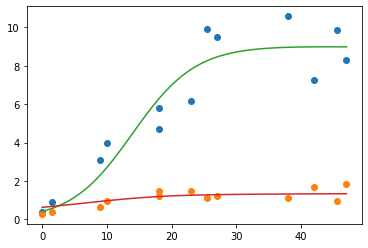

In [48]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t = [0,1.5,9,10,18,18,23,25.5,27,38,42,45.5,47]
Scerevisiae = [0.375,0.92,3.08,3.99,4.69,5.78,6.15,9.91,9.47,10.57,7.27,9.88,8.3]
Skephir = [0.29,0.37,0.63,0.98,1.47,1.22,1.46,1.11,1.225,1.1,1.71,0.96,1.84]

y0 = [0.4110,0.6258]

def model(Y, t, p):
    b1,d1,b2,d2 = [0.2586358386628328, 0.020297666177709655, 0.057442052129218456, 0.009768668323201373]
    c1,c2 = p
    X,Y = Y
    return [X*(b1 - d1*X - c1*Y),Y*(b2 - d2*Y - c2*X)]

def loss(p):
    y0 = p[0:2]
    p = p[2:]
    y = odeint(model,y0,t,(p,))
    return (y - np.array([Scerevisiae,Skephir]).T).ravel()
    
params = [.1,.1,.05,.004]
    
opt = optimize.leastsq(loss, params) 

print(opt)

plt.plot(t, Scerevisiae,'o')
plt.plot(t, Skephir,'o')
plt.plot(np.linspace(0,t[-1],100), odeint(model,opt[0][0:2],np.linspace(0,t[-1],100),(opt[0][2:],)))
print(opt)

## Fun Mathematical Solution:

https://dpananos.github.io/posts/2019/05/blog-post-14/